In [24]:
import sys
import json
import pandas as pd
import numpy as np
import os
print(pd.__version__)

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline



1.4.0


In [25]:
# for fakeSolver
METRIC_NAMES = ['euclidean_distance', 'mse', 'emd', 'f1']

benchmark_files_fixed = [f for f in os.listdir('bsi_zoo/data/') if ('pkl' in f) and ('fixed' in f) and ('20313' in f or '166' in f) and ('CV' not in f)]
benchmark_files_free = [f for f in os.listdir('bsi_zoo/data/') if 'pkl' in f and 'free' in f and ('166'  in f or '313' in f) and 'CV' not in f]

dfs_fixed = [pd.read_pickle(f'bsi_zoo/data/{file}') for file in benchmark_files_fixed]
dfs_free = [pd.read_pickle(f'bsi_zoo/data/{file}') for file in benchmark_files_free]

df_results_fixed = pd.concat(dfs_fixed)
df_results_free = pd.concat(dfs_free)
df_results_free

,estimator,euclidean_distance,mse,emd,f1,reconstructed_noise,alpha,cov_type,n_sensors,n_sources,n_times,nnz,orientation_type,path_to_leadfield,estimator__alpha
0,fake_solver,0.050396,0.001790,0.056660,0.000427,0.036235,0.99,diag,50,200,10,1,free,bsi_zoo/tests/data/lead_field_free_CC120313.npz,0.662870
1,fake_solver,0.050396,0.001786,0.056664,0.000427,0.029335,0.99,diag,50,200,10,1,free,bsi_zoo/tests/data/lead_field_free_CC120313.npz,0.439397
2,fake_solver,0.050396,0.001780,0.056710,0.000427,0.023919,0.99,diag,50,200,10,1,free,bsi_zoo/tests/data/lead_field_free_CC120313.npz,0.291263
3,fake_solver,0.050396,0.001771,0.056803,0.000427,0.019681,0.99,diag,50,200,10,1,free,bsi_zoo/tests/data/lead_field_free_CC120313.npz,0.193070
4,fake_solver,0.050396,0.001761,0.056963,0.000427,0.016328,0.99,diag,50,200,10,1,free,bsi_zoo/tests/data/lead_field_free_CC120313.npz,0.127980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12315,fake_solver,0.042978,3399.264877,0.050072,0.002132,0.472154,0.01,diag,50,200,10,5,free,bsi_zoo/tests/data/lead_field_free_CC120166.npz,0.016379
12316,fake_solver,0.042978,4987.220954,0.050179,0.002132,0.435251,0.01,diag,50,200,10,5,free,bsi_zoo/tests/data/lead_field_free_CC120166.npz,0.010857
12317,fake_solver,0.046015,7166.012356,0.050334,0.002132,0.398365,0.01,diag,50,200,10,5,free,bsi_zoo/tests/data/lead_field_free_CC120166.npz,0.007197
12318,fake_solver,0.046015,10073.111480,0.050507,0.002132,0.362138,0.01,diag,50,200,10,5,free,bsi_zoo/tests/data/lead_field_free_CC120166.npz,0.004771


In [29]:
import scipy.io as sio
for i, df in enumerate(dfs_fixed):
    df['alpha'] = 1-df['alpha'].astype('float')
    OutData = {} 

    # convert DF to dictionary before loading to your dictionary
    OutData['Obj'] = df.to_dict('list')

    sio.savemat(f'./bsi_zoo/data/{benchmark_files_fixed[i][:-4]}.mat',OutData)
# /home/anujanegi/tj/bdsg/BSI-Zoo/bsi_zoo/data

In [39]:
# # removed benchmarks that don't have all metrics.
# df_results_fixed = df_results_fixed.dropna(axis=0, how='any')
# df_results_free = df_results_free.dropna(axis=0, how='any')

# df_results_free.shape

(38847, 15)

In [23]:
df_results_fixed['alpha'].unique()

array([0.01, 0.1 , 0.2 , 0.4 , 0.5 , 0.6 , 0.9 ])

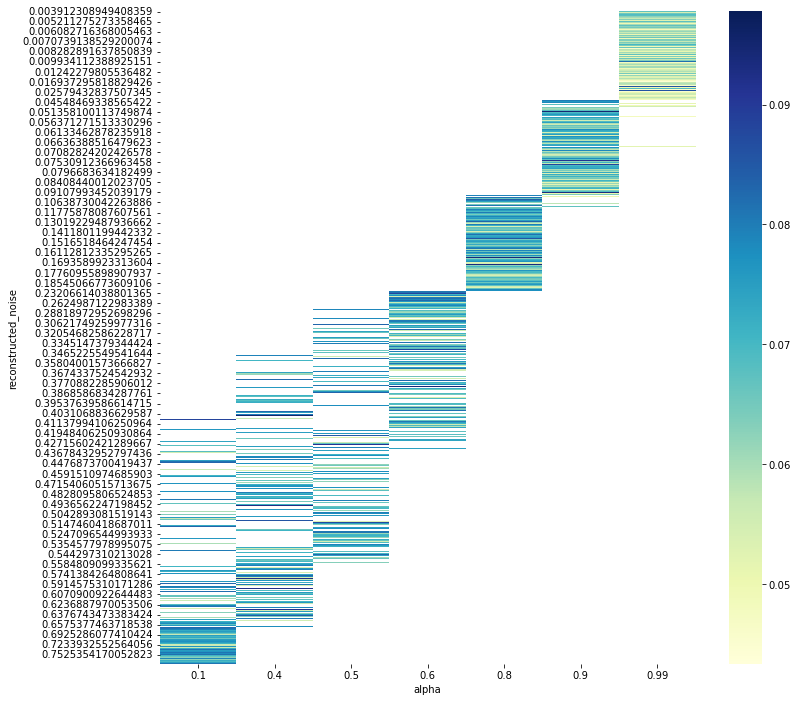

In [83]:
plt.figure(figsize=(12, 12))

ax = sns.heatmap(data, annot=False, fmt=".2f", cmap="YlGnBu")


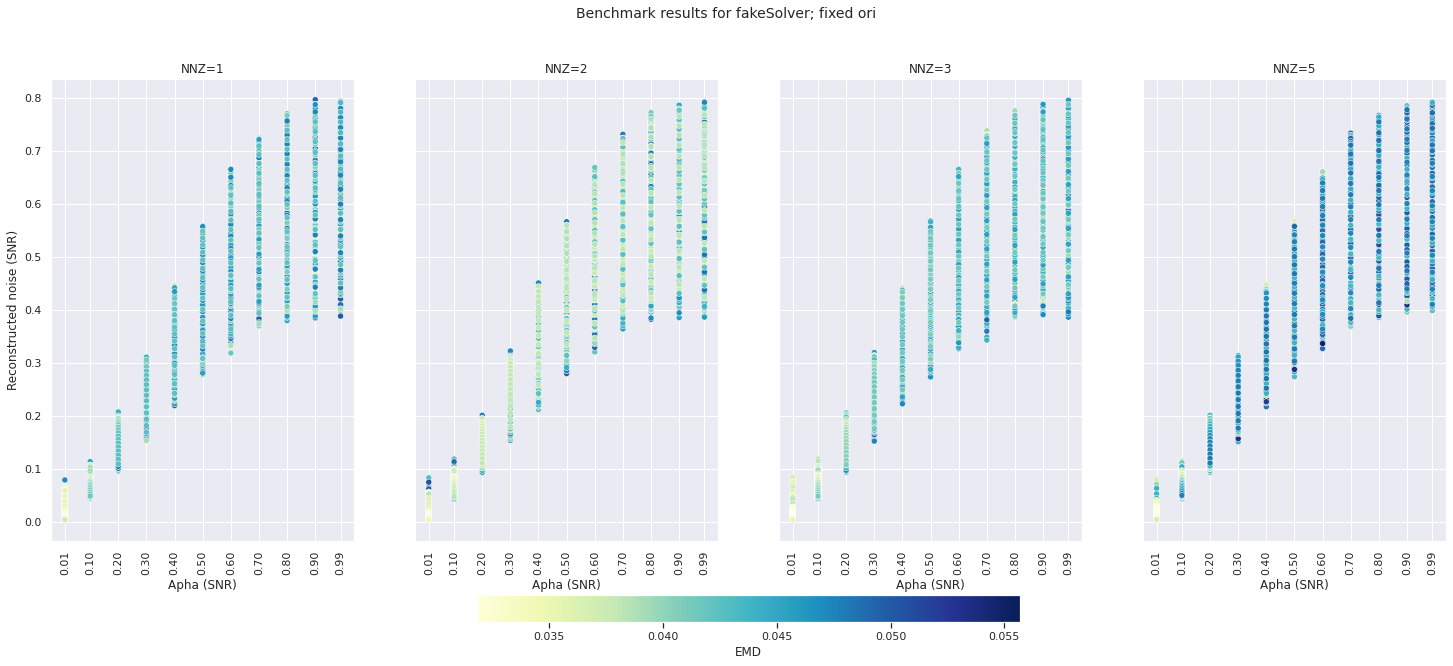

In [30]:
# just testing
df_results_fixed['alpha'] = 1-df_results_fixed['alpha'].astype(float)

sns.set()
# tips = sns.load_dataset("tips")
# plt.figure(figsize=(12, 12))
fig, axs = plt.subplots(1, len(df_results_fixed['nnz'].unique()), figsize=(25, 10), sharey=True)
for i, nnzi in enumerate(df_results_fixed['nnz'].unique()):
    
    data = df_results_fixed[df_results_fixed['nnz']==nnzi]
    ax = sns.scatterplot(y="reconstructed_noise", x="alpha", hue="emd",
                        palette='YlGnBu', data=data, ax=axs[i], legend=False)
    # set x ticks for each subplot
    axs[i].set_xticks(df_results_fixed['alpha'].unique())
    # xticks vertical
    axs[i].tick_params(axis='x', rotation=90)
    # xlabel
    axs[i].set_xlabel('Apha (SNR)')
    axs[i].set_ylabel('Reconstructed noise (SNR)')
    axs[i].set_title(f'NNZ={nnzi}')

norm = plt.Normalize(data['emd'].min(), data['emd'].max())
sm = plt.cm.ScalarMappable(cmap="YlGnBu", norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axs, orientation='horizontal', fraction=0.05, pad=0.1, label='EMD')
# set colorbar label
# set title
fig.suptitle('Benchmark results for fakeSolver; fixed ori', fontsize=14)

# axs.figure.colorbar(sm)

plt.show()


In [43]:
data = df_results_free[df_results_free['nnz']==1]

a = data.where(data['alpha']==0.1)
a

,estimator,euclidean_distance,mse,emd,f1,reconstructed_noise,alpha,cov_type,n_sensors,n_sources,n_times,nnz,orientation_type,path_to_leadfield,estimator__alpha
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


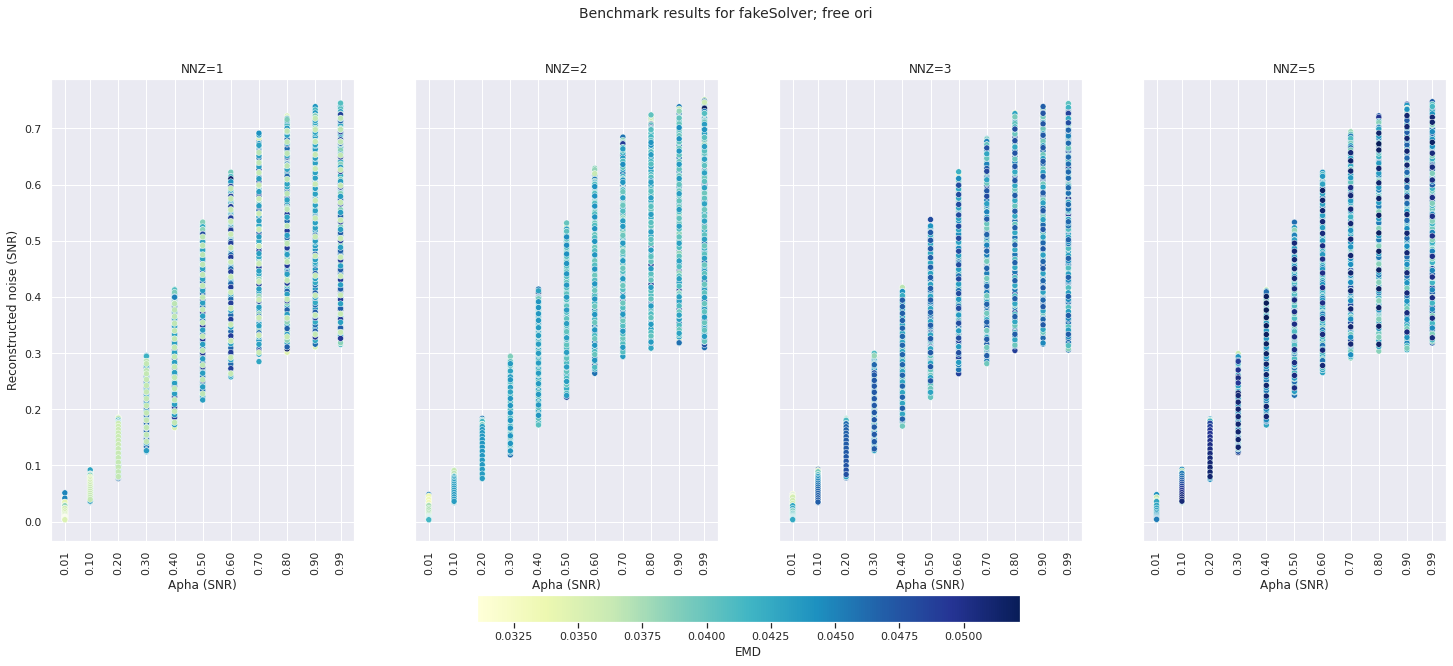

In [31]:
df_results_free['alpha'] = 1-df_results_free['alpha'].astype(float)

sns.set()
# tips = sns.load_dataset("tips")
# plt.figure(figsize=(12, 12))
fig, axs = plt.subplots(1, len(df_results_free['nnz'].unique()), figsize=(25, 10), sharey=True)
for i, nnzi in enumerate(df_results_fixed['nnz'].unique()):
    
    data = df_results_free[df_results_free['nnz']==nnzi]
    ax = sns.scatterplot(y="reconstructed_noise", x="alpha", hue="emd",
                        palette='YlGnBu', data=data, ax=axs[i], legend=False)
    # set x ticks for each subplot
    axs[i].set_xticks(df_results_free['alpha'].unique())
    # xticks vertical
    axs[i].tick_params(axis='x', rotation=90)
    # xlabel
    axs[i].set_xlabel('Apha (SNR)')
    axs[i].set_ylabel('Reconstructed noise (SNR)')
    axs[i].set_title(f'NNZ={nnzi}')

norm = plt.Normalize(data['emd'].min(), data['emd'].max())
sm = plt.cm.ScalarMappable(cmap="YlGnBu", norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axs, orientation='horizontal', fraction=0.05, pad=0.1, label='EMD')
# set colorbar label
# set title
fig.suptitle('Benchmark results for fakeSolver; free ori', fontsize=14)

# axs.figure.colorbar(sm)

plt.show()


In [98]:
df_results_fixed['nnz'].unique()

array([1, 2, 3, 5])

In [66]:
test = df_results_fixed[df_results_fixed['estimator'] == 'fake_solver'][df_results_fixed['nnz']==1]
test

,estimator,euclidean_distance,mse,emd,f1,reconstructed_noise,alpha,cov_type,n_sensors,n_sources,n_times,nnz,orientation_type,path_to_leadfield,estimator__alpha
0,fake_solver,0.043015,0.000110,0.062522,0.000427,0.024770,0.99,diag,50,200,10,1,fixed,bsi_zoo/tests/data/lead_field_CC120166.npz,0.662870
1,fake_solver,0.043015,0.000110,0.062321,0.000427,0.019684,0.99,diag,50,200,10,1,fixed,bsi_zoo/tests/data/lead_field_CC120166.npz,0.439397
2,fake_solver,0.043015,0.000110,0.062198,0.000427,0.015873,0.99,diag,50,200,10,1,fixed,bsi_zoo/tests/data/lead_field_CC120166.npz,0.291263
3,fake_solver,0.043015,0.000110,0.062160,0.000427,0.013060,0.99,diag,50,200,10,1,fixed,bsi_zoo/tests/data/lead_field_CC120166.npz,0.193070
4,fake_solver,0.043015,0.000111,0.062214,0.000427,0.011005,0.99,diag,50,200,10,1,fixed,bsi_zoo/tests/data/lead_field_CC120166.npz,0.127980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17495,fake_solver,0.087873,0.630224,0.078019,0.000427,0.568973,0.10,diag,50,200,10,1,fixed,bsi_zoo/tests/data/lead_field_CC120313.npz,0.016379
17496,fake_solver,0.087873,0.980982,0.078070,0.000427,0.536733,0.10,diag,50,200,10,1,fixed,bsi_zoo/tests/data/lead_field_CC120313.npz,0.010857
17497,fake_solver,0.087873,1.505530,0.078164,0.000427,0.503370,0.10,diag,50,200,10,1,fixed,bsi_zoo/tests/data/lead_field_CC120313.npz,0.007197
17498,fake_solver,0.087873,2.280376,0.078295,0.000427,0.469163,0.10,diag,50,200,10,1,fixed,bsi_zoo/tests/data/lead_field_CC120313.npz,0.004771


In [67]:
# for free orientation
# df_results_fixed.pivot_table('emd', ['estimator', 'nnz', 'reconstructed_noise'], 'alpha')

# SNR vs NNZ
for df_results, orientation in zip([df_results_fixed, df_results_free], ["fixed", "free"]):
    for metric in METRIC_NAMES:
        # data = df_results.pivot_table(metric, ["estimator", "alpha"], "nnz", aggfunc='mean')
        data = df_results_fixed[df_results_fixed['estimator'] == 'fake_solver'][df_results_fixed['nnz']==1].pivot_table('emd', ['reconstructed_noise'], 'alpha', aggfunc='mean')

        from collections import OrderedDict
        plt.figure(figsize=(12, 12))
        df=data
        ax = sns.heatmap(df, annot=True, cmap="YlGnBu")

        ylabel_mapping = OrderedDict()
        for estimator, alpha in df.index:
            ylabel_mapping.setdefault(estimator, [])
            ylabel_mapping[estimator].append(alpha)

        hline = []
        new_ylabels = []
        for estimator, alpha_list in ylabel_mapping.items():
            alpha_list[0] = "{} - {}".format(str(estimator).replace("_", " "), alpha_list[0])
            new_ylabels.extend(alpha_list)

            if hline:
                hline.append(len(alpha_list) + hline[-1])
            else:
                hline.append(len(alpha_list))


        ax.hlines(hline, xmin=-1, xmax=4, color="white", linewidth=5)
        ax.set_yticklabels(new_ylabels)
        plt.ylabel('Alpha (SNR)')
        plt.title(f'{metric.replace("_", " ").upper()} - {orientation}')
        # plt.savefig(f'bsi_zoo/data/figs/SNR_vs_NNZ_{metric}_{orientation}.png')
        plt.show()


ValueError: The number of FixedLocator locations (65), usually from a call to set_ticks, does not match the number of ticklabels (9800).

Error in callback <function flush_figures at 0x7ff6c2092670> (for post_execute):


KeyboardInterrupt: 

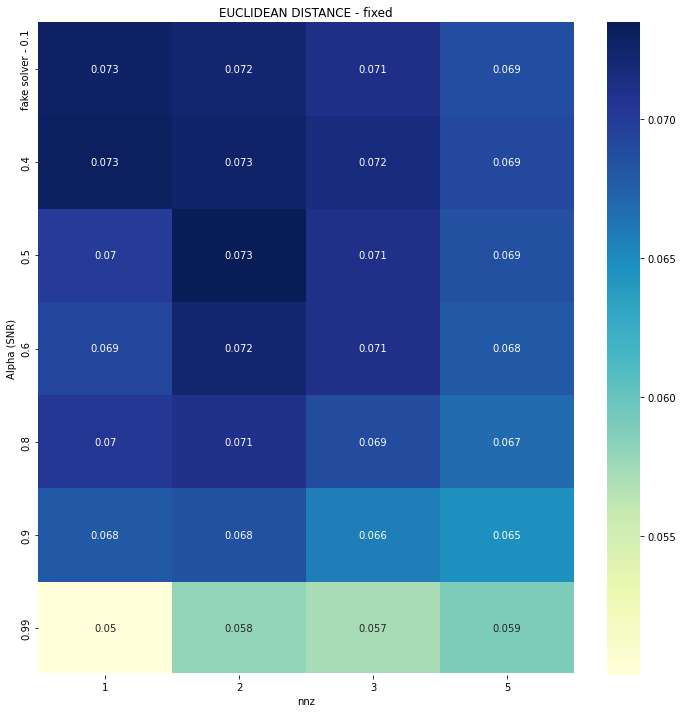

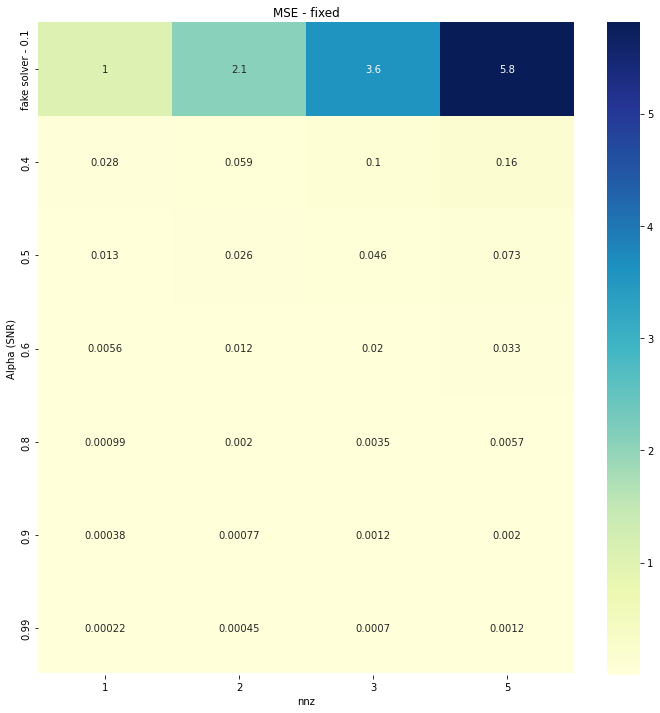

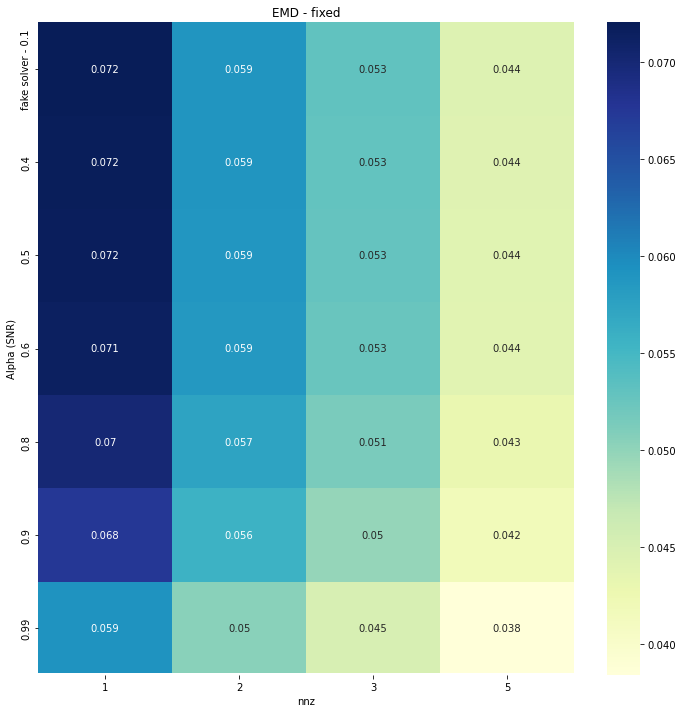

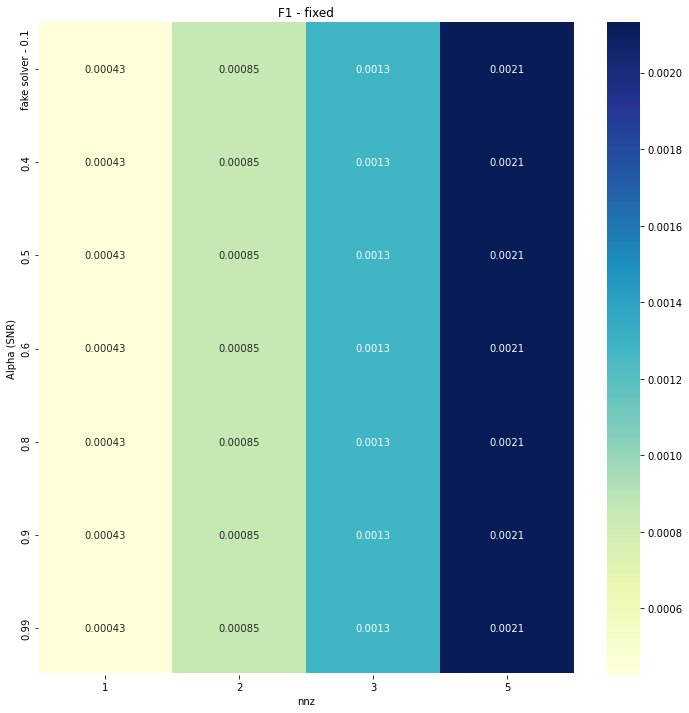

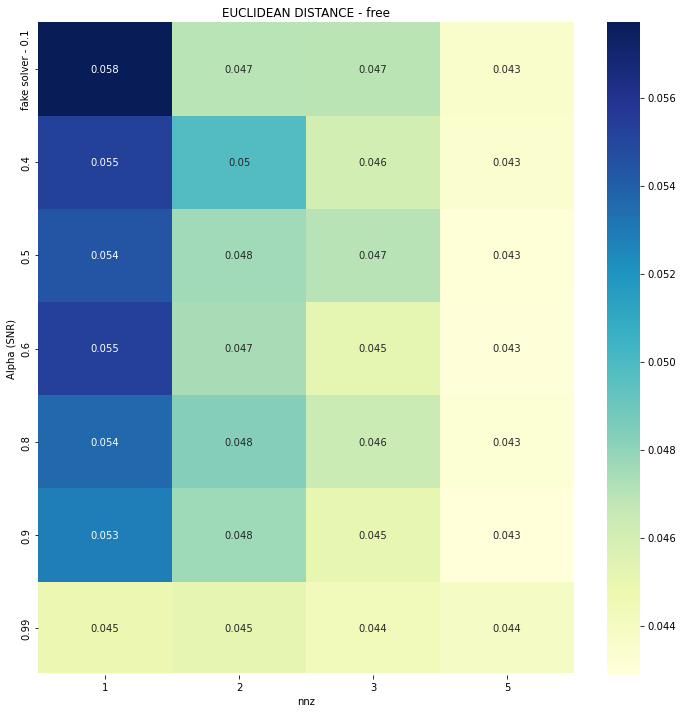

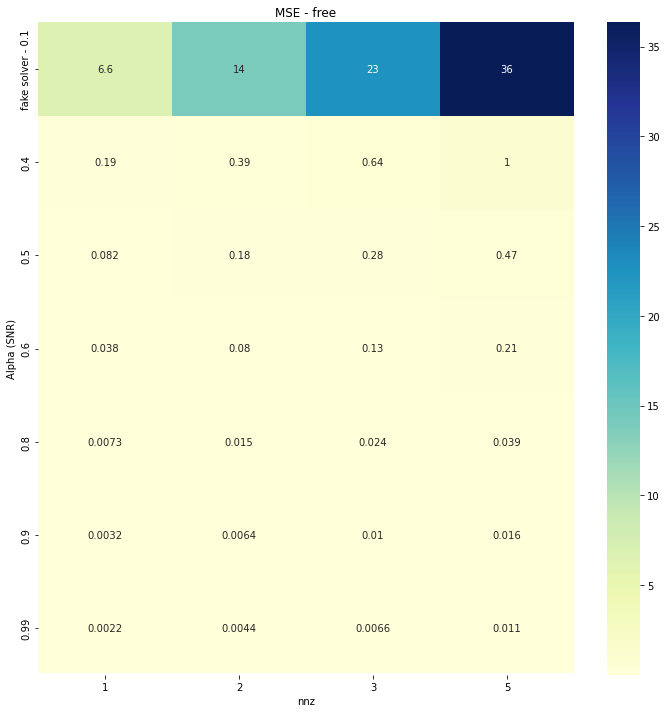

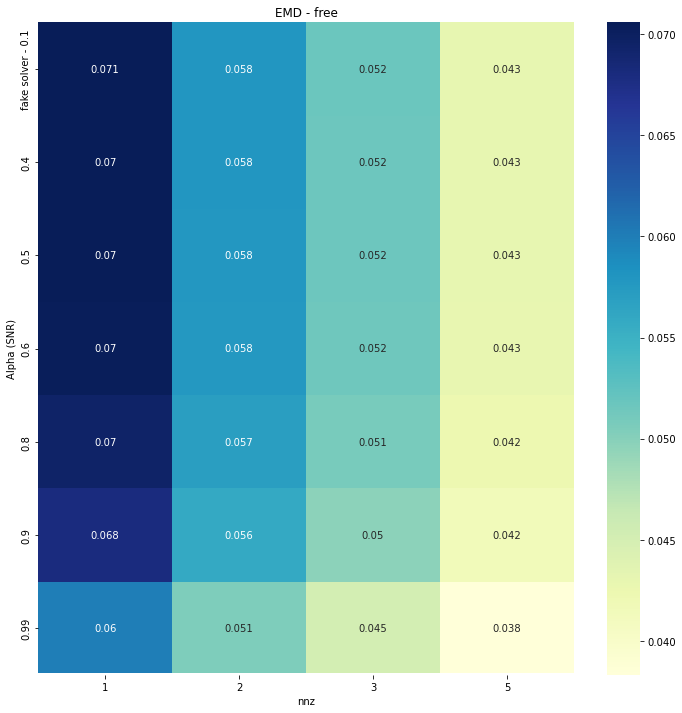

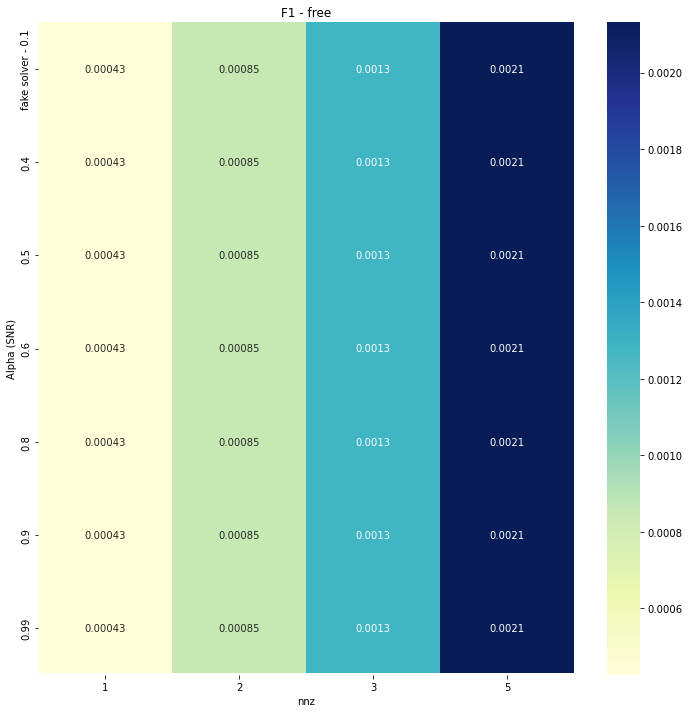

In [41]:
# SNR vs NNZ
for df_results, orientation in zip([df_results_fixed, df_results_free], ["fixed", "free"]):
    for metric in METRIC_NAMES:
        data = df_results.pivot_table(metric, ["estimator", "alpha"], "nnz", aggfunc='mean')

        from collections import OrderedDict
        plt.figure(figsize=(12, 12))
        df=data
        ax = sns.heatmap(df, annot=True, cmap="YlGnBu")

        ylabel_mapping = OrderedDict()
        for estimator, alpha in df.index:
            ylabel_mapping.setdefault(estimator, [])
            ylabel_mapping[estimator].append(alpha)

        hline = []
        new_ylabels = []
        for estimator, alpha_list in ylabel_mapping.items():
            alpha_list[0] = "{} - {}".format(str(estimator).replace("_", " "), alpha_list[0])
            new_ylabels.extend(alpha_list)

            if hline:
                hline.append(len(alpha_list) + hline[-1])
            else:
                hline.append(len(alpha_list))


        ax.hlines(hline, xmin=-1, xmax=4, color="white", linewidth=5)
        ax.set_yticklabels(new_ylabels)
        plt.ylabel('Alpha (SNR)')
        plt.title(f'{metric.replace("_", " ").upper()} - {orientation}')
        plt.savefig(f'bsi_zoo/data/figs/SNR_vs_NNZ_{metric}_{orientation}.png')
        plt.show()

In [44]:
# SNR vs estimator alpha plot
# SNR vs NNZ
for df_results, orientation in zip([df_results_fixed, df_results_free], ["fixed", "free"]):
    for metric in METRIC_NAMES:
        try:
            data = df_results.pivot_table(metric, ["estimator", "alpha"], "estimator__alpha_cv", aggfunc='mean')

            from collections import OrderedDict
            plt.figure(figsize=(12, 12))
            df=data
            ax = sns.heatmap(df, annot=True, cmap="YlGnBu")

            ylabel_mapping = OrderedDict()
            for estimator, alpha in df.index:
                ylabel_mapping.setdefault(estimator, [])
                ylabel_mapping[estimator].append(alpha)

            hline = []
            new_ylabels = []
            for estimator, alpha_list in ylabel_mapping.items():
                alpha_list[0] = "{} - {}".format(str(estimator).replace("_", " "), alpha_list[0])
                new_ylabels.extend(alpha_list)

                if hline:
                    hline.append(len(alpha_list) + hline[-1])
                else:
                    hline.append(len(alpha_list))


            ax.hlines(hline, xmin=-1, xmax=4, color="white", linewidth=5)
            ax.set_yticklabels(new_ylabels)
            plt.ylabel('Alpha (SNR)')
            plt.xlabel('Estimator alpha')
            plt.title(f'{metric.replace("_", " ").upper()} - {orientation}')
            plt.savefig(f'bsi_zoo/data/figs/SNR_vs_estimator_alpha_{metric}_{orientation}.png')
            plt.show()
        
        except:
            pass

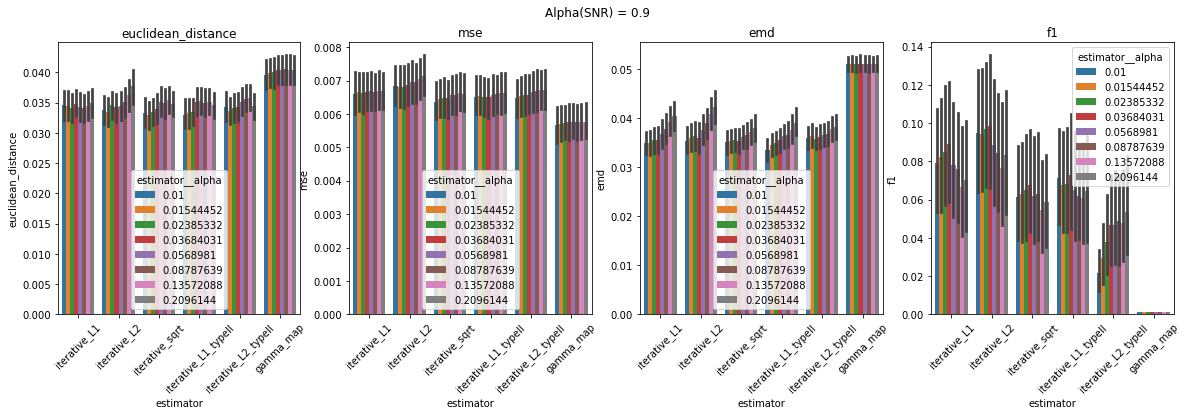

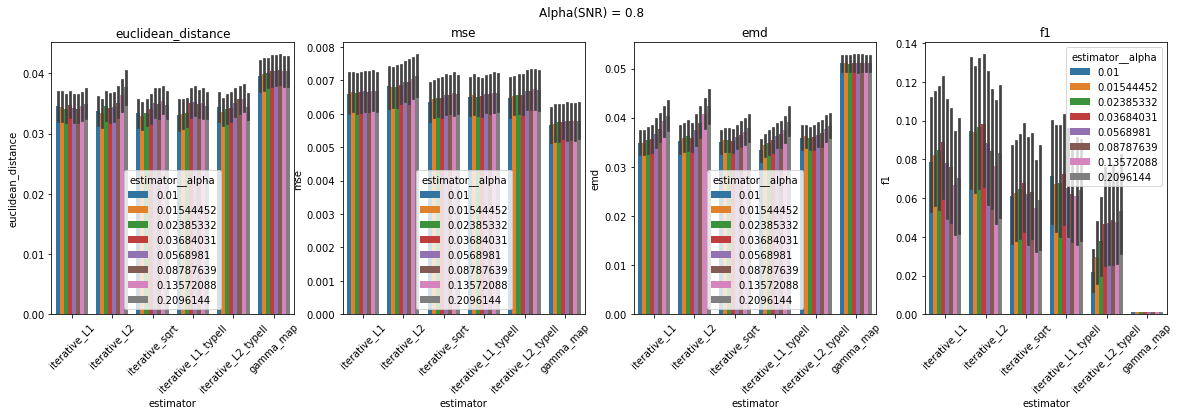

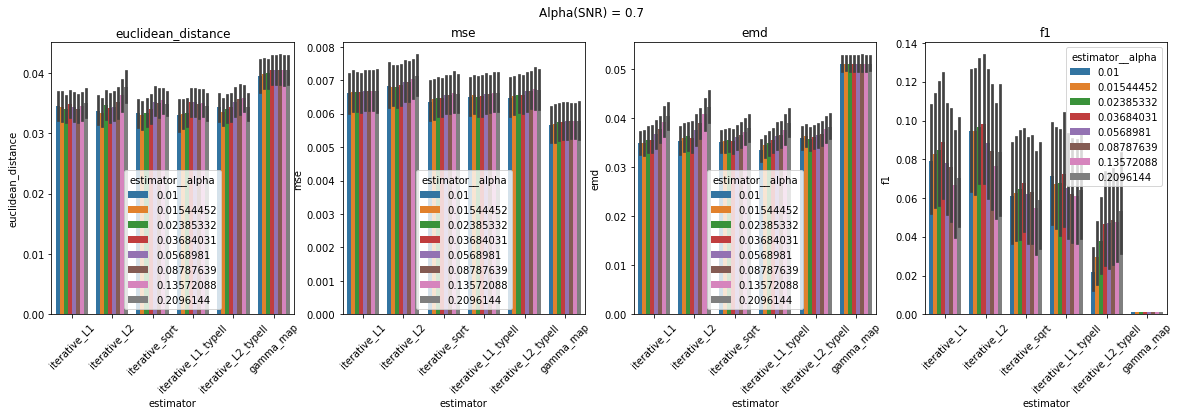

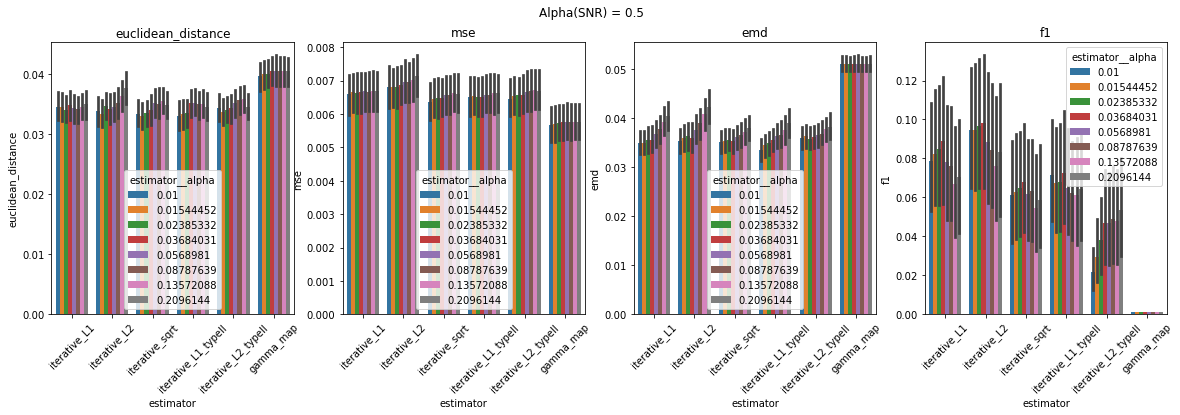

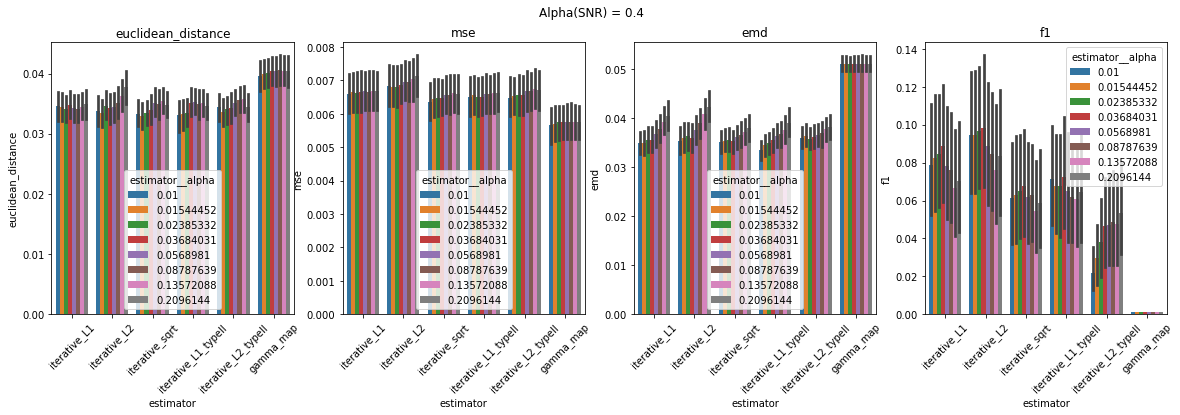

In [7]:
for alpha in df_results["alpha"].unique():
    fig, ax = plt.subplots(1, len(METRIC_NAMES), figsize=(20, 5))
    for i, metric in enumerate(METRIC_NAMES):
        this_df_results = df_results[df_results["alpha"] == alpha]
        sns.barplot(
            data=this_df_results, x="estimator", y=metric, hue="estimator__alpha", ax=ax[i]
        )
        ax[i].set_title(f"{metric}")
        ax[i].tick_params('x', labelrotation=45)

    fig.suptitle(f'Alpha(SNR) = {alpha}')

plt.show()

<Figure size 432x288 with 0 Axes>

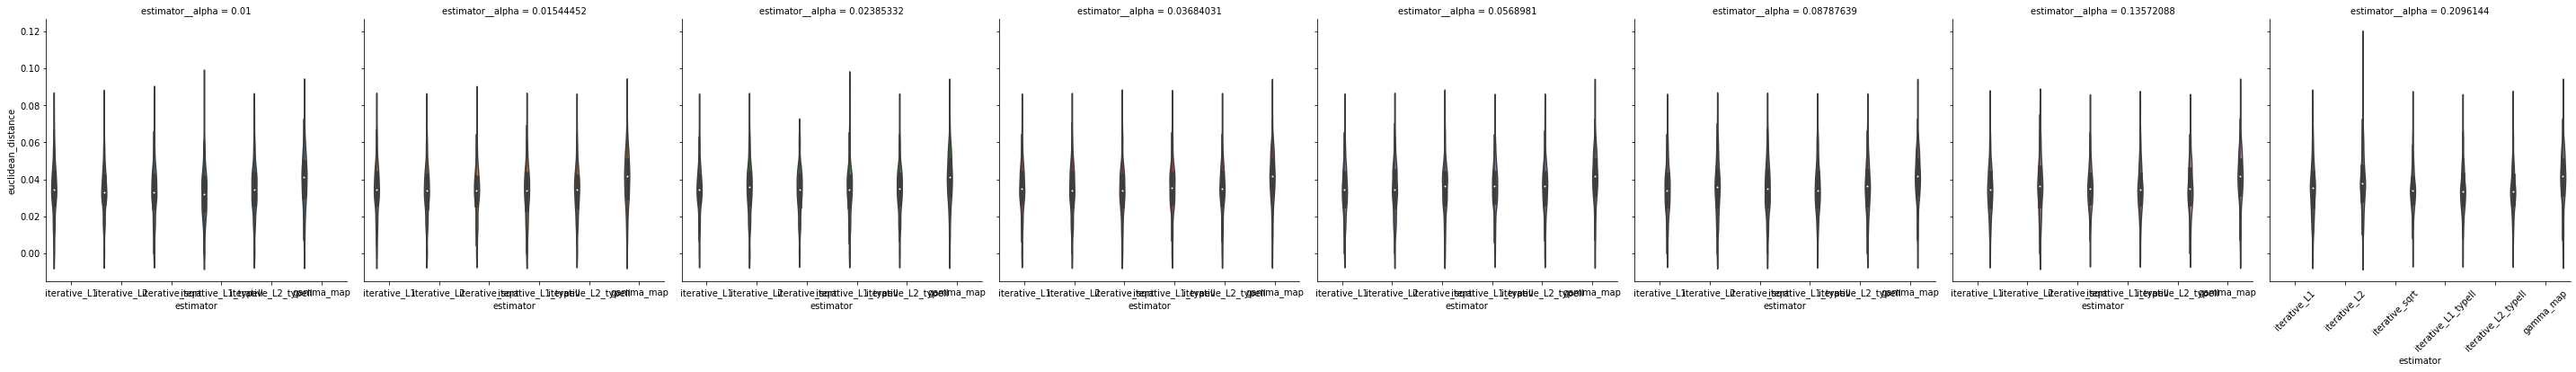

<Figure size 432x288 with 0 Axes>

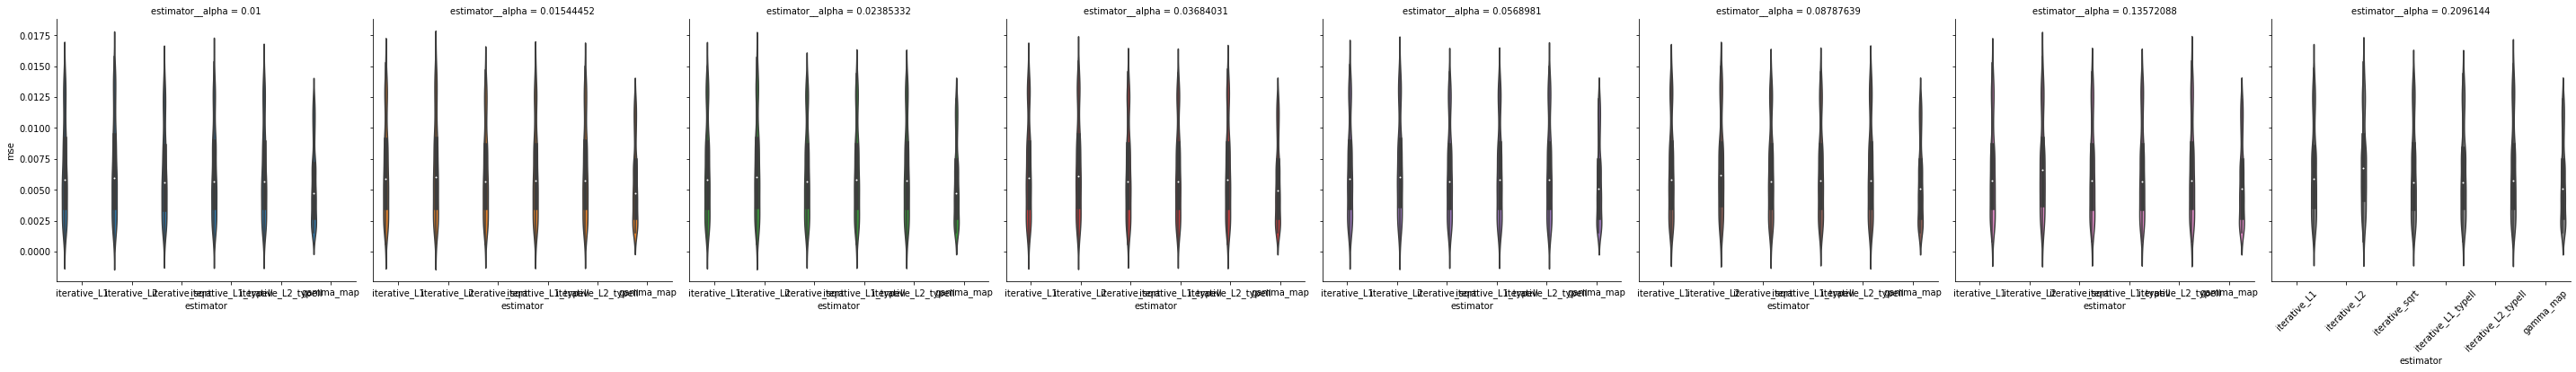

<Figure size 432x288 with 0 Axes>

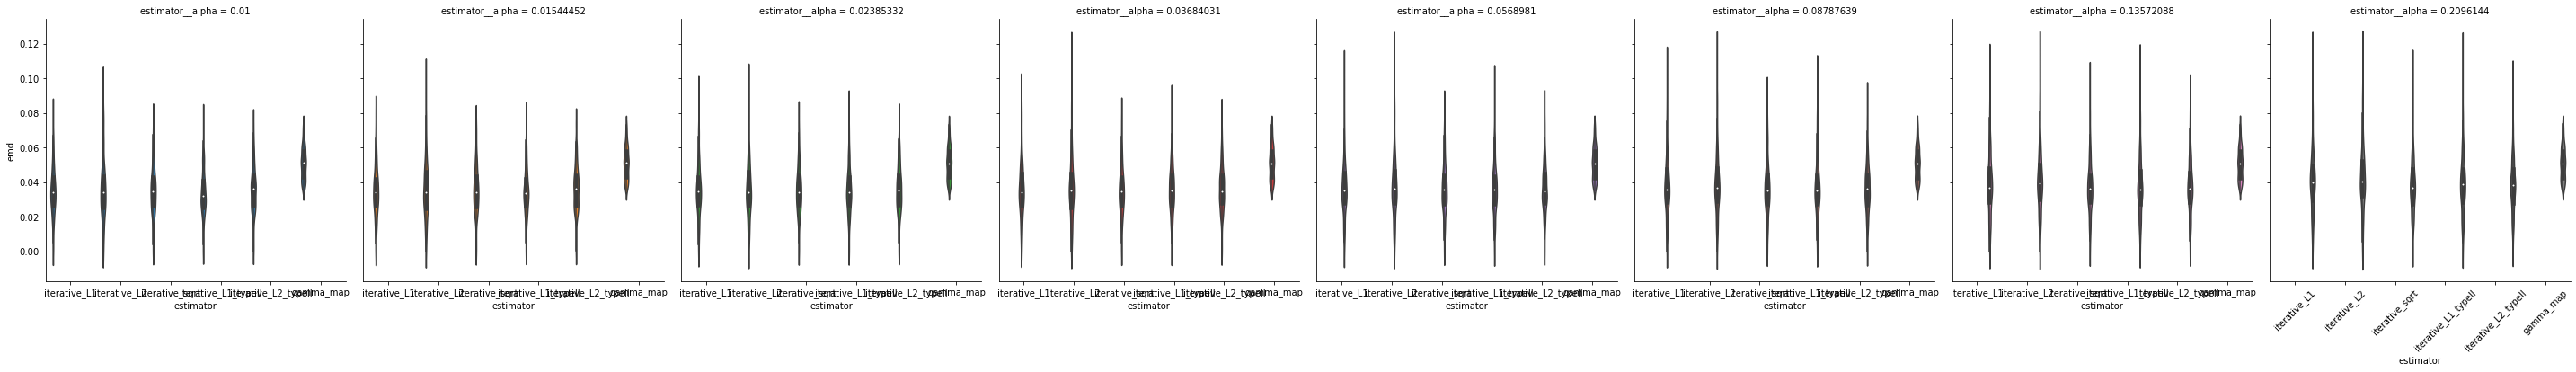

<Figure size 432x288 with 0 Axes>

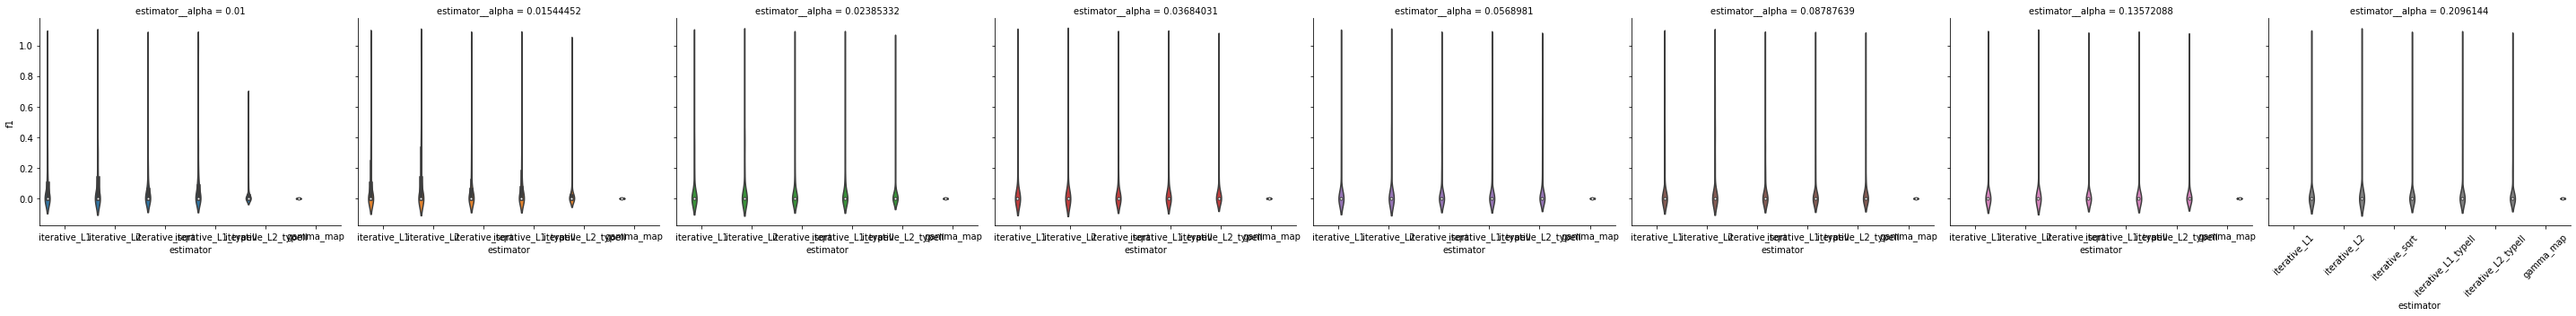

In [8]:
for metric in METRIC_NAMES:
    plt.figure()
    sns.catplot(x="estimator", y=metric, hue="estimator__alpha", data=df_results, ci="sd", kind="violin", col="estimator__alpha")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# def draw_phase_map(val_map, best_map, meth_lab, xlabels, ylabels) :
#     #creation of the figure
#     fig, ax = plt.subplots(figsize=(12, 10))

#     # color map
#     #cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
#     myColors = ((0.8, 0.0, 0.0, 0.5), (0.0, 0.8, 0.0, 0.5), (0.0, 0.0, 0.8, 0.5),(0.8, 0.8, 0.0, 0.5),(0.8, 0.0, 0.8, 0.5),(0.0, 0.8, 0.8, 0.5))
#     # TODO : Find a better way to generate the right amount of colors
#     cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', myColors[:len(meth_lab)], len(myColors))

#     # plot heatmap
#     #sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
#     #           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
#     #           cbar_kws={"shrink": .8}, square=True)
#     ax = sb.heatmap(best_map, annot=val_map, 
#             linewidths=5, cmap=cmap, 
#             cbar_kws={"shrink": .8,'label': 'methods'}, square=True)
    
#     # Manually specify colorbar labelling after it's been generated
#     colorbar = ax.collections[0].colorbar
#     colorbar.set_ticks(np.arange(len(meth_lab)))
#     colorbar.set_ticklabels(meth_lab)

#     # ticks
#     plt.yticks(plt.yticks()[0], labels=ylabels, rotation=0)
#     plt.ylabel('nnz')
#     plt.xticks(plt.xticks()[0], labels=xlabels)
#     plt.xlabel('alpha')

#     # title
#     title = 'Phase Diagram of Metric EMD\nWith a standard Leadfield\n'
#     plt.title(title, loc='left', fontsize=18)

#     # Drawing frontier
#     #sb.lineplot([0,1],[1,1])

#     plt.show()

#     return 

# def select_set(df,orient,est_alpha):
#     return df.loc[(df['orientation_type'] == orient) & (df['estimator__alpha'] == est_alpha)]

# def df_to_matrix(df,alpha_set,nnz_set,metric):
#     mat_from_df = np.zeros((len(nnz_set),len(alpha_set)))
#     for i in range(len(nnz_set)):
#         for j in range(len(alpha_set)):
#             mat_from_df[i,j] = df[(df['nnz'] == nnz_set[i]) & (df['alpha'] == alpha_set[j])][metric]
#     return mat_from_df

# def read_data(df, query):
#     subdf = select_set(df,query[0],query[1])

#     alpha_set = np.sort(subdf['alpha'].unique())
#     nnz_set = np.sort(subdf['nnz'].unique())
#     estimators = subdf['estimator'].unique()

#     val = df_to_matrix(subdf.loc[(subdf['estimator'] == estimators[0])],alpha_set,nnz_set,query[2])
#     phase_map = np.zeros((len(nnz_set),len(alpha_set)))

#     for k in range(1,len(estimators)) :
#         estimator = estimators[k]
#         matrix = df_to_matrix(subdf.loc[(subdf['estimator'] == estimator)],alpha_set,nnz_set,query[2])
#         mask = matrix<val
#         val[mask] = matrix[mask]
#         phase_map[mask] = k
    
#     draw_phase_map(val,phase_map,estimators,alpha_set,nnz_set)
#     return val

In [10]:
# read_data(df_results,['fixed',0.2,'f1'])